In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [3]:
edges = pd.read_csv("./git_web_ml/musae_git_edges.csv")
edges.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [4]:
with open("./git_web_ml/musae_git_features.json") as f:
    features = json.load(f)

In [5]:
# convert keys from string to int
features = {int(k):v for k,v in features.items()}

In [6]:
# deal with the varying feature length
node_feature_length = {}
for i in range(len(features)):
    node_feature_length[i] = len(features[i])

print("max feature length", max(node_feature_length.values()))
print("min feature length", min(node_feature_length.values()))

max feature length 42
min feature length 8


In [7]:
# append zeros to features with shorter than max length
for i in range(len(features)):
    if node_feature_length[i] < max(node_feature_length.values()):
        num_zeros = max(node_feature_length.values())-node_feature_length[i]
        features[i] = features[i] + [0]*num_zeros

In [8]:
features = list(features.values()) # convert to list

In [9]:
fea_dic = {}
for i in range(len(features)):
    fea_dic[i] = features[i]
print(fea_dic[4])

[1929, 3773, 1793, 3511, 1290, 3129, 3077, 364, 1171, 1022, 2045, 536, 1119, 91, 1532, 3771, 1122, 703, 1001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
target = pd.read_csv("./git_web_ml/musae_git_target.csv")
target.head(10)

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1
5,5,j6montoya,0
6,6,sfate,0
7,7,amituuush,0
8,8,mauroherlein,0
9,9,ParadoxZero,0


In [11]:
labels = target['ml_target'].to_list()

In [12]:
lab_dic = {}
for i in range(len(labels)):
    lab_dic[i] = labels[i]
print(lab_dic[4])

1


#  Build Graph

In [13]:
nx_G = nx.Graph()
for i in target['id']:
    nx_G.add_node(i)
for i in range(len(edges)):
    nx_G.add_edge(edges.loc[i][0],edges.loc[i][1])

In [14]:
print(nx.info(nx_G))
num_nodes = nx_G.number_of_nodes()
num_edges = nx_G.number_of_edges()

Graph with 37700 nodes and 289003 edges


In [15]:
nx.set_node_attributes(nx_G, fea_dic, "features")
nx.set_node_attributes(nx_G, lab_dic, "labels")

In [16]:
#nx_G.nodes[1]["features"]

In [17]:
nx_G.nodes[1]["labels"]

0

#  Analysis

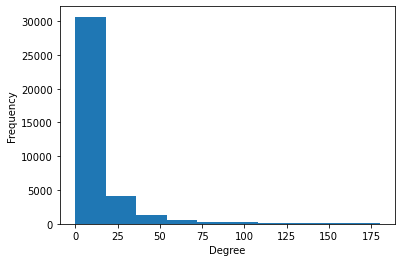

In [17]:
## degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, range=[0, 180])
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

plot_degree_dist(nx_G)

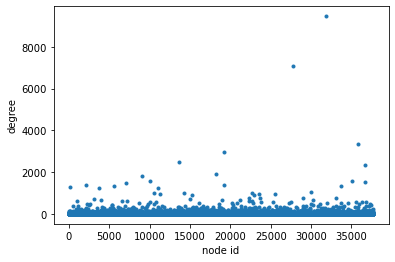

In [18]:

##degree_for_each_node
dfen = []
for i in range(num_nodes):
    dfen.append(nx_G.degree(i))
                                                      
                                                                                                 
plt.figure(1)   
                                                                                                                                                                                                                                                      
# prep axes                                                                                                                      
plt.xlabel('node id')                                                                                                               
                                                                                                           
plt.ylabel('degree')                                                                                                          
                                                                                                        
                                                                                                                                     # do plot                                                                                                                       
plt.scatter(range(num_nodes), dfen, marker='.')
plt.show()

Text(0, 0.5, 'Frequency')

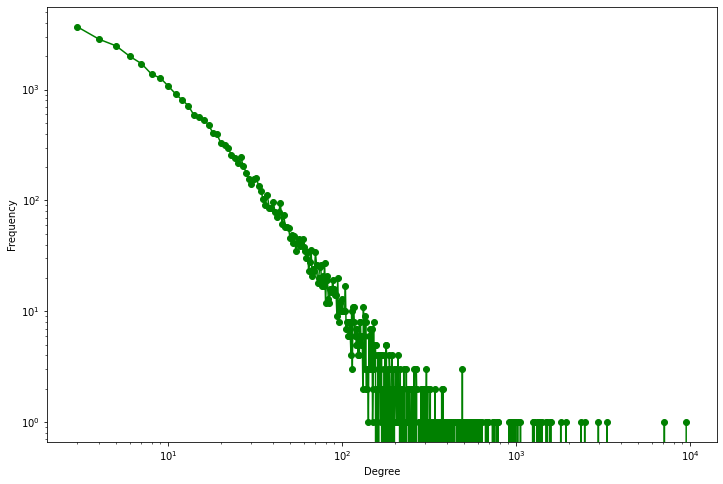

In [19]:
## see if the network with a degree distribution following a power law
m=3
degree_freq = nx.degree_histogram(nx_G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

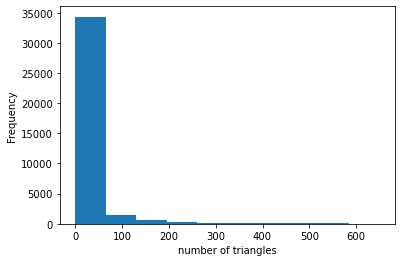

In [20]:
# number of triangles
num_tri = []
for i in range(num_nodes):
    num_tri.append(nx.triangles(nx_G, i))
    
plt.hist(num_tri,  range=[0, 650])
plt.xlabel('number of triangles')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Set colors by label
target = target.set_index('id')
target = target.reindex(nx_G.nodes())
 
target['ml_target'] = pd.Categorical(target['ml_target'])
target['ml_target'].cat.codes



id
0        0
1        0
2        1
3        0
4        1
        ..
37695    1
37696    0
37697    0
37698    1
37699    0
Length: 37700, dtype: int8

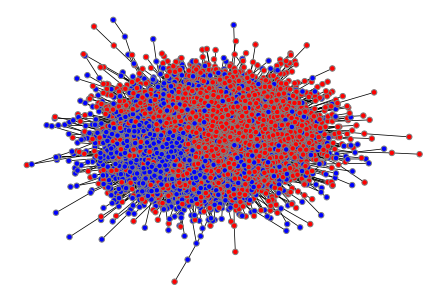

In [20]:
import matplotlib.colors
# Set color map
cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
nx.draw(nx_G, with_labels=False, node_color=target['ml_target'].cat.codes, cmap=cmap, node_size=30, width=0.75, edgecolors='gray')
plt.show()

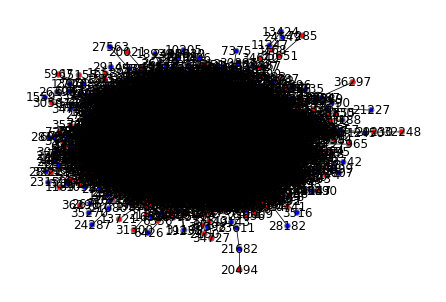

In [21]:
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
nx.draw(nx_G, with_labels=True, node_color=target['ml_target'].cat.codes, cmap=cmap, node_size=30, width=0.75, edgecolors='gray')
plt.show()

In [22]:
nx_G.nodes[20490]["labels"]

1

In [21]:
# average shortest path length
print(nx.average_shortest_path_length(nx_G))

#for C in (nx_G.subgraph(c).copy() for c in nx.connected_components(nx_G)):
#    print(nx.average_shortest_path_length(C))

3.2464090056353823


In [19]:
#betweenness_centrality -- bc is a dict of nodes with betweenness centrality as the value.
bc = nx.betweenness_centrality(nx_G)

In [20]:
import csv
names = target['name'].to_list()
bc_file = open("betweenness_centrality.csv", "w")
writer = csv.writer(bc_file)
for key, value in bc.items():
    writer.writerow([key, names[key], value])

bc_file.close()

In [21]:
#get degree dict
degrees = {}
for i in range(len(names)):
    d = nx_G.degree[i]
    degrees[i] = d

d_file = open("degree.csv", "w")
writer = csv.writer(d_file)
for key, value in degrees.items():
    writer.writerow([key, names[key], value])

d_file.close()

In [23]:
bc = pd.read_csv('betweenness_centrality.csv')

In [28]:
bc0 = bc.iloc[:,2]
bc0 = bc0.tolist()


[1.1499155409179053e-06, 0.0, 5.317137842680702e-05, 6.135293901008024e-09, 0.0, 2.0988864681279354e-06, 6.165520943708171e-07, 1.7843037633935994e-07, 2.712301219168088e-05, 0.0001897247083832]


In [38]:
tmp = bc.iloc[:,2].tolist()
bc0.sort()
top10 = bc0[-10:]
top10index = []
for i in top10:
    top10index.append(tmp.index(i))

for i in top10index:
    print(bc.iat[i,0], bc.iat[i,1], bc.iat[i,2])

#print(top10)
#print(top10index)


19253 JonnyBanana 0.0203152624455979
33671 shayan-taheri 0.0212605764505683
18163 nelsonic 0.0257991619039893
10001 ronenhamias 0.0276116678118553
36652 rfthusn 0.0308403065104948
13638 gabrielpconceicao 0.035337494180908
35773 addyosmani 0.0434081325634308
19222 Bunlong 0.0553227478416067
27803 nfultz 0.2405414222349693
31890 dalinhuang99 0.2695992678587705
